CIFAR-10 dataset consists of 60k 32*32 colour images of 10 classes, with 6000 images per class

In [41]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

In [44]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [21]:
X_train.shape

(50000, 32, 32, 3)

In [22]:
X_test.shape

(10000, 32, 32, 3)

In [23]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

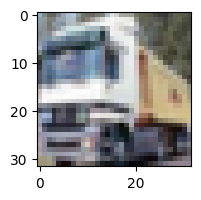

In [50]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[1])

In [25]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [45]:
y_train = y_train.reshape(-1,)#converts column to flat vector
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [27]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [51]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

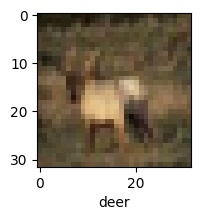

In [52]:
plot_sample(X_train, y_train, 3)

In [30]:
X_train = X_train/255
X_test = X_test /255

In [32]:
cnn = models.Sequential([
    #feature generation
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)), #kernel size indicate filter shape
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    #ann
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),#output neurons can be less here in case of cnn
    layers.Dense(10, activation = 'softmax')#softmax activation is used to normalize the probability result so that the sum of all probabilites is 1
])

c:\Users\a812616\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [34]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.4491 - loss: 1.5220
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5802 - loss: 1.1888
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6286 - loss: 1.0682
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6539 - loss: 0.9937
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6726 - loss: 0.9411
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6902 - loss: 0.8925
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7024 - loss: 0.8585
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7122 - loss: 0.8306
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7194 - loss: 0.8040
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7286 - loss: 0.7791


In [35]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6926 - loss: 0.9041


[0.9040631055831909, 0.6926000118255615]

In [46]:
y_test = y_test.reshape(-1,)

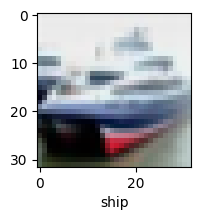

In [53]:
plot_sample(X_test, y_test, 1)

In [37]:
y_pred = cnn.predict(X_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[7.77884910e-04, 7.00039673e-04, 1.06919967e-02, ...,
        4.23833757e-04, 5.37691228e-02, 1.71038427e-03],
       [1.07894778e-01, 1.42357990e-01, 2.89850606e-04, ...,
        4.05375204e-06, 7.31784523e-01, 1.76398624e-02],
       [3.85069363e-02, 1.88711539e-01, 4.12070286e-03, ...,
        3.38217244e-04, 7.42121398e-01, 2.48770472e-02],
       ...,
       [1.83513239e-05, 3.34227911e-06, 9.14946571e-03, ...,
        6.97513297e-02, 7.91086932e-04, 1.09455941e-05],
       [2.38299549e-01, 3.30698527e-02, 9.45177302e-03, ...,
        1.54445809e-03, 2.88064737e-04, 6.31429534e-03],
       [1.70084240e-05, 1.33119511e-05, 2.43586837e-03, ...,
        9.81311500e-01, 2.28135377e-06, 1.40265665e-05]],
      shape=(10000, 10), dtype=float32)

In [38]:
y_pred_classes = [np.argmax(element) for element in y_pred]
y_pred_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(8), np.int64(4)]

In [39]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [48]:
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1000
           1       0.83      0.80      0.81      1000
           2       0.56      0.59      0.58      1000
           3       0.51      0.51      0.51      1000
           4       0.64      0.60      0.62      1000
           5       0.61      0.56      0.59      1000
           6       0.77      0.76      0.76      1000
           7       0.71      0.77      0.74      1000
           8       0.79      0.83      0.81      1000
           9       0.79      0.76      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

